In [16]:
# chainer の宣言
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
# chainerから Variable, Chainのクラスと configのオブジェクトをimport
from chainer import Variable,Chain,config

In [2]:
# 基本モジュールの宣言
import numpy as np
import matplotlib.pyplot as plt
# 乱数生成
D = 100
N = 2
xdata = np.random.randn(D*N).reshape(D,N).astype(np.float32)
# 関数の定義
def f(x):
    y = x*x
    return y
# 条件式を満たすものを見つけ出す
tdata = (xdata[:,1] > f(xdata[:,0])).astype(np.int32)

In [3]:
# 1層のニューラルネットワークを呼び出す
C = 2
NN = Chain(l1 = L.Linear(N,C))
# C = 2は二種類の出力結果があることを明言している.
# tdataの中身が0,1の二種類の値であることに対応している.
# l1 = L.Linear(N,C)では, N入力, C出力の線形変換(Linear Transformation)を表している.
# 一つのデータに対して, 入力と出力の個数がそれぞれN個とC個あり, N個の数値にそれぞれ重みをかけて足し合わせてC個の数値へと変換する（線形変換）.
# 「数値の組み合わせ」 = ニューラルネットワークで行われること.
# NNはニューラルネットワーク（Neural Network）の略称を示している.

In [4]:
# 関数の定義
def model(x):
    y = NN.l1(x)
    return y

In [5]:
# 関数の利用と出力結果の表示
ydata = model(xdata)
print(ydata)

variable([[ 3.6923308e-02  2.4774368e+00]
          [ 4.8020616e-01 -2.2080266e+00]
          [ 3.0576146e-01 -1.0717193e+00]
          [ 6.9746065e-01 -1.2891831e+00]
          [-4.3374562e-01  9.5645815e-01]
          [-1.9676024e+00 -4.7321701e-01]
          [-1.6902453e+00 -4.2971689e-01]
          [ 1.2371627e+00 -5.0770909e-01]
          [-7.3873544e-01  7.1876568e-01]
          [ 1.3081619e-01 -1.4237343e+00]
          [ 1.2260857e+00 -3.9754629e-01]
          [ 1.1529603e+00 -5.8690852e-01]
          [-1.7762195e+00  3.1208304e-01]
          [-1.4104851e+00  4.1725478e-01]
          [ 1.3255123e+00  1.0398190e+00]
          [ 6.9469698e-02  1.7196984e+00]
          [-1.1966449e+00  3.9837959e-01]
          [ 2.1793085e-01  6.0978848e-01]
          [-2.7294913e-01 -2.7762905e-01]
          [ 2.2488689e+00 -5.3310549e-01]
          [-2.2862397e-01 -1.0203416e+00]
          [ 1.5850670e+00  4.5856079e-01]
          [-2.0557566e-01  1.1798997e+00]
          [-5.9972662e-01 -7.48484

In [6]:
# 精度の検証
acc = F.accuracy(ydata,tdata)
print(acc)

variable(0.22)


In [7]:
# 最適化手法の設定, optimizerの使用方法
# 初歩的な方法の最適化
optNN = Opt.SGD()
# 最適化するニューラルネットワークの指定
optNN.setup(NN)

In [8]:
# 学習の記録を残す場所の用意
# 誤差関数の記録
loss_series = []
# 成績の記録
acc_series = []

In [9]:
# 結界を張る
# optimizerの回数を指定, 学習の回数を指定
T = 5000
for time in range(T):
    # ニューラルネットワークのモードを切り替える.
    # Trueにすることで学習モードにする.
    config.train = True
    # 初期化, 全ての勾配をゼロにしている. optNN.targetは, 「optNN.setupで指定されたNN」を示している.
    optNN.target.zerograds()
    # 現状のニューラルネットワークを用いてデータを試しに２つに分類している.
    ydata = model(xdata)
    # 現状の結果(ydata)と正解の値(tdata)がどれだけ近いのかを示す誤差関数の計算を行った. その結果をlossに記録している.
    loss = F.softmax_cross_entropy(ydata,tdata)
    # 現状の成績のチェックをして, accに記録している.
    acc = F.accuracy(ydata,tdata)
    # 誤差関数の計算過程を振り返って誤差伝搬法を実行している.
    loss.backward()
    # 最後にNNを調整する.
    optNN.update()
    # lossとaccをloss_seriesとacc_seriesに加えてリストとして記録する.
    # .dataをつけることで, 数値の読み込みだけを行っている.
    loss_series.append(loss.data)
    acc_series.append(acc.data)

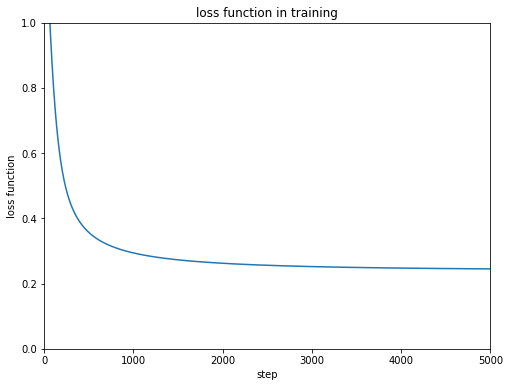

In [10]:
# 学習の記録の表示
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

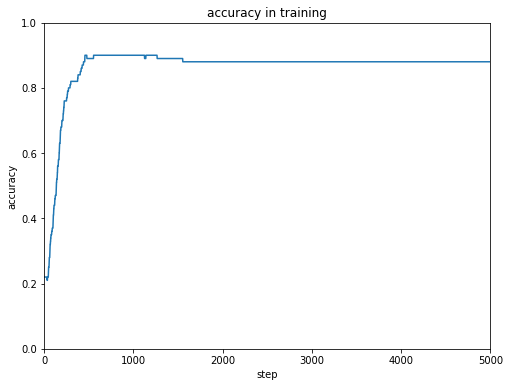

In [11]:
# 学習の記録の表示
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

In [12]:
# 2層のニューラルネットワークを呼び出す.
C = 2
NN = Chain(l1=L.Linear(N,4), l2=L.Linear(4,C))

In [13]:
# ２層のニューラルネットワークの関数化
# この場合は非線型変換が必須になる.
#　非線型変換は線形変換の後の実行する.
def model(x):
    h = NN.l1(x)
    # 先見変換を施した後に非線型変換を施す.
    h = F.sigmoid(h)
    y = NN.l2(h)
    return h
# データをいくつかの種類に分けることを「識別」と呼ぶ.

In [14]:
# 再びSGDでの方法で学習をさせる
optNN = Opt.SGD()
optNN.setup(NN)

# 学習の記録を用意
loss_series = []
acc_series = []

# 学習の回数の指定
T = 20000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

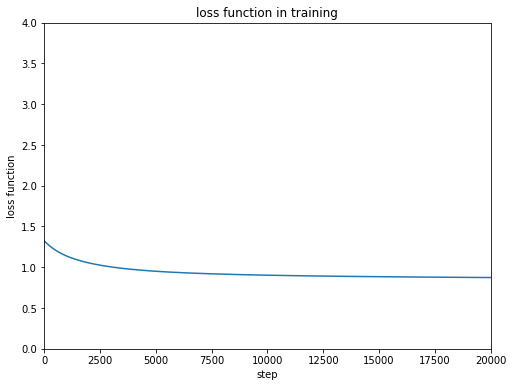

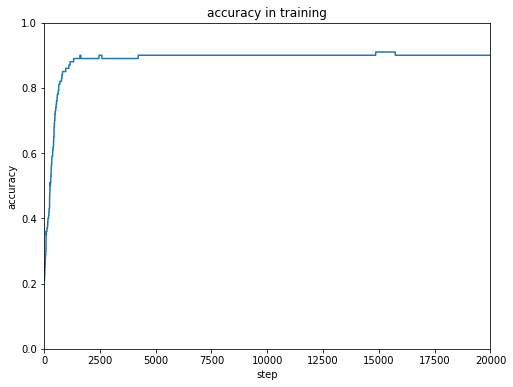

In [17]:
# 誤差関数の表示
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 4])
plt.show()

# 精度の表示
plt.figure(figsize=(8,6))
plt.plot(range(Tall), acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()